In [ ]:
!pip install torch torchvision

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision.utils import save_image
import matplotlib.pyplot as plt
import os

In [ ]:
# Hyperparameters
image_size = 28 * 28  # MNIST images are 28x28
hidden_size = 256
latent_size = 64
batch_size = 100
learning_rate = 0.0002
num_epochs = 100


In [ ]:
# Define the generator model
class Generator(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, output_size),
            nn.Tanh()
        )
    def forward(self, x):
        return self.model(x)

# Define the discriminator model
class Discriminator(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_size, hidden_size),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_size, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.model(x)

In [ ]:
# Transform to normalize the MNIST images (-1, 1) and convert to tensor
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load MNIST dataset
mnist = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
dataloader = torch.utils.data.DataLoader(mnist, batch_size=batch_size, shuffle=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:01<00:00, 4971599.44it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 134801.16it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:03<00:00, 476850.39it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2887756.37it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
# Initialize generator and discriminator models
generator = Generator(latent_size, hidden_size, image_size)
discriminator = Discriminator(image_size, hidden_size)

# Loss and optimizers
criterion = nn.BCELoss()
optimizer_g = optim.Adam(generator.parameters(), lr=learning_rate)
optimizer_d = optim.Adam(discriminator.parameters(), lr=learning_rate)

In [ ]:
# Function to denormalize images
def denorm(x):
    return (x + 1) / 2
# Make directory for saving generated images
os.makedirs('gan_images', exist_ok=True)
# Training loop
for epoch in range(num_epochs):
    for i, (images, _) in enumerate(dataloader):
        # Flatten the images
        images = images.view(batch_size, -1)
        # Create real and fake labels
        real_labels = torch.ones(batch_size, 1)
        fake_labels = torch.zeros(batch_size, 1)

        # ============================
        # Train the Discriminator
        # ============================
        # Compute BCE_Loss using real images
        outputs = discriminator(images)
        d_loss_real = criterion(outputs, real_labels)
        real_score = outputs
        # Generate fake images
        z = torch.randn(batch_size, latent_size)
        fake_images = generator(z)
        # Compute BCE_Loss using fake images
        outputs = discriminator(fake_images)
        d_loss_fake = criterion(outputs, fake_labels)
        fake_score = outputs
        # Backprop and optimize
        d_loss = d_loss_real + d_loss_fake
        optimizer_d.zero_grad()
        d_loss.backward()
        optimizer_d.step()

        # ============================
        # Train the Generator
        # ============================

        # Generate fake images
        z = torch.randn(batch_size, latent_size)
        fake_images = generator(z)
        # Compute loss with flipped labels
        outputs = discriminator(fake_images)
        g_loss = criterion(outputs, real_labels)
        # Backprop and optimize
        optimizer_g.zero_grad()
        g_loss.backward()
        optimizer_g.step()
        if (i+1) % 200 == 0:
          print(f'Epoch [{epoch}/{num_epochs}], Step [{i+1}/{len(dataloader)}], D Loss: {d_loss.item():.4f}, G Loss: {g_loss.item():.4f}')
    # Save real and fake images
    if (epoch+1) % 10 == 0:
        fake_images = fake_images.reshape(fake_images.size(0), 1, 28, 28)
        save_image(denorm(fake_images), f'gan_images/fake_images-{epoch+1}.png')


Epoch [0/100], Step [200/600], D Loss: 0.0570, G Loss: 4.4766
Epoch [0/100], Step [400/600], D Loss: 0.1856, G Loss: 5.2889
Epoch [0/100], Step [600/600], D Loss: 0.0243, G Loss: 5.0769
Epoch [1/100], Step [200/600], D Loss: 0.1049, G Loss: 4.7020
Epoch [1/100], Step [400/600], D Loss: 0.1109, G Loss: 4.5115
Epoch [1/100], Step [600/600], D Loss: 0.4420, G Loss: 4.2857
Epoch [2/100], Step [200/600], D Loss: 0.0616, G Loss: 4.5439
Epoch [2/100], Step [400/600], D Loss: 0.1037, G Loss: 3.4809
Epoch [2/100], Step [600/600], D Loss: 1.4536, G Loss: 1.9058
Epoch [3/100], Step [200/600], D Loss: 0.3448, G Loss: 4.6213
Epoch [3/100], Step [400/600], D Loss: 0.9027, G Loss: 2.9286
Epoch [3/100], Step [600/600], D Loss: 0.2801, G Loss: 3.9716
Epoch [4/100], Step [200/600], D Loss: 0.6710, G Loss: 1.8561
Epoch [4/100], Step [400/600], D Loss: 0.4907, G Loss: 2.6420
Epoch [4/100], Step [600/600], D Loss: 0.2632, G Loss: 3.3097
Epoch [5/100], Step [200/600], D Loss: 0.3619, G Loss: 3.1924
Epoch [5

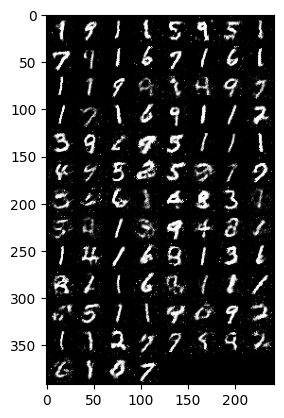

In [ ]:
# View generated images from epoch 100
import matplotlib.image as mpimg

# Load and display an example image
img = mpimg.imread('gan_images/fake_images-100.png')
imgplot = plt.imshow(img)
plt.show()